In [1]:
import pandas as pd

df = pd.read_excel('Filtered_data.xlsx')
df['answer'] = df['answer'].astype(str)

import pandas as pd
from PIL import Image
import os


# Define the root directory where your datasets are stored
root_dir = r'G:\Research - AAA - Supervisor Prof. Waleed\LLMs\Dataset'

# Function to construct the path, open the image, and return the image object
def load_image(row):
    split = row['split']
    idx = row['idx']
    image_path = os.path.join(root_dir, str(split), str(idx), 'image.png')
    try:
        with Image.open(image_path) as image:
            return image.copy()  # Copy the image to keep it in memory and then close the file
    except FileNotFoundError:
        print(f"Image not found at path: {image_path}")
        return None

# Apply the function to each row in the DataFrame
df['image'] = df.apply(load_image, axis=1)

# Check the DataFrame to ensure images are loaded
print(df[['split', 'idx', 'image']])

      split    idx                                              image
0     train      1  <PIL.Image.Image image mode=RGB size=750x429 a...
1     train      2  <PIL.Image.Image image mode=RGB size=302x232 a...
2     train      3  <PIL.Image.Image image mode=RGB size=302x232 a...
3      test      5  <PIL.Image.Image image mode=RGB size=302x232 a...
4      test     11  <PIL.Image.Image image mode=RGB size=452x595 a...
...     ...    ...                                                ...
8614   test  21196  <PIL.Image.Image image mode=RGB size=750x429 a...
8615   test  21199  <PIL.Image.Image image mode=RGB size=704x358 a...
8616   test  21200  <PIL.Image.Image image mode=RGB size=252x192 a...
8617  train  21203  <PIL.Image.Image image mode=RGB size=750x600 a...
8618  train  21208  <PIL.Image.Image image mode=RGB size=750x429 a...

[8619 rows x 3 columns]


In [2]:
# Split the DataFrame based on the 'split' column
# train_val_df = df[df['split'].isin(['train', 'val'])]  # Combine 'train' and 'val' rows
train_df = df[df['split'] == 'train'].reset_index(drop=True)  # Train rows
val_df =  df[df['split'] == 'val'].reset_index(drop=True)
test_df = df[df['split'] == 'test'].reset_index(drop=True)


In [3]:
train_df

,question,choices,answer,hint,image,task,grade,subject,topic,category,skill,lecture,solution,split,idx,prompt
0,أي من هذه الولايات هي الأبعد شمالا؟,"['فرجينيا الغربية', 'لويزيانا', 'أريزونا', 'أو...",0,NaN,<PIL.Image.Image image mode=RGB size=750x429 a...,اختيار مغلق,الصف الثاني,العلوم الاجتماعية,الجغرافيا,الجغرافيا,قراءة الخريطة: الاتجاهات الأساسية,تحتوي الخرائط على أربعة اتجاهات أساسية، أو اتج...,للعثور على الإجابة، انظر إلى وردة البوصلة. انظ...,train,1,المادة هي : العلوم الاجتماعية و موضوع السؤال ه...
1,حدد السؤال الذي يمكن لتجربة توم وجاستن الإجابة...,['هل تتوقف كرات تنس الطاولة عن التدحرج على الأ...,1,يصف المقطع أدناه تجربة. اقرأ المقطع ثم اتبع ال...,<PIL.Image.Image image mode=RGB size=302x232 a...,اختيار مغلق,الصف الثامن,العلوم الطبيعية,ممارسات العلوم والهندسة,تصميم التجارب,حدد السؤال التجريبي,يمكن تصميم التجارب للإجابة على أسئلة محددة. كي...,NaN,train,2,المادة هي : العلوم الطبيعية و موضوع السؤال هو ...
2,حدد السؤال الذي يمكن لتجربة كاثلين وبراينت الإ...,['هل تنزلق لوح التزلج الخاص بكاثلين أسفل التل ...,0,يصف المقطع أدناه تجربة. اقرأ المقطع ثم اتبع ال...,<PIL.Image.Image image mode=RGB size=302x232 a...,اختيار مغلق,الصف السابع,العلوم الطبيعية,ممارسات العلوم والهندسة,تصميم التجارب,حدد السؤال التجريبي,يمكن تصميم التجارب للإجابة على أسئلة محددة. كي...,NaN,train,3,المادة هي : العلوم الطبيعية و موضوع السؤال هو ...
3,ما هو احتمال أن الماعز الناتج عن هذا التهجين س...,"['1/4', '0/4', '4/4', '2/4', '3/4']",0,يصف هذا المقطع سمة التوتر العضلي الخلقي في الم...,<PIL.Image.Image image mode=RGB size=251x239 a...,اختيار مغلق,الصف الثامن,العلوم الطبيعية,علم الأحياء,الجينات إلى السمات,استخدم مربعات بانيت لحساب احتمالات أنواع النسل,النمط الجيني للذرية: متماثل أم متغاير؟\nكيف تح...,NaN,train,17,المادة هي : العلوم الطبيعية و موضوع السؤال هو ...
4,قارن بين متوسط ​​طاقات الحركة للجسيمات في كل ع...,['لا هذا ولا ذاك؛ العينات لها نفس درجة الحرارة...,2,تُظهر المخططات أدناه عينتين نقيتين من الغاز في...,<PIL.Image.Image image mode=RGB size=563x405 a...,اختيار مغلق,الصف الثامن,العلوم الطبيعية,الفيزياء,حركة الجسيمات والطاقة,تحديد كيفية تأثير حركة الجسيمات على درجة الحرا...,تعتمد درجة حرارة المادة على متوسط ​​الطاقة الح...,الجسيمات في كلتا العينتين لها نفس السرعة المتو...,train,19,المادة هي : العلوم الطبيعية و موضوع السؤال هو ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5198,ما هي الدولة المميزة؟,"['ناورو', 'جزر سليمان', 'ولايات ميكرونيسيا الم...",2,NaN,<PIL.Image.Image image mode=RGB size=750x625 a...,اختيار مغلق,الصف السابع,العلوم الاجتماعية,الجغرافيا,أوقيانوسيا: الجغرافيا,تحديد واختيار بلدان أوقيانوسيا,NaN,هذه الدولة هي ولايات ميكرونيسيا المتحدة.,train,21187,المادة هي : العلوم الاجتماعية و موضوع السؤال ه...
5199,ما هي الخاصية المشتركة بين هذين الجسمين؟,"['قابل للتمدد', 'أصفر']",0,اختر الإجابة الأفضل.,<PIL.Image.Image image mode=RGB size=364x208 a...,اختيار مغلق,الصف الثاني,العلوم الطبيعية,الفيزياء,مواد,مقارنة خصائص الأشياء,لكل شيء خصائص مختلفة. يمكن لخاصية الشيء أن تخب...,انظر إلى كل جسم.\nوبالنسبة لكل جسم، قرر ما إذا...,train,21188,المادة هي : العلوم الطبيعية و موضوع السؤال هو ...
5200,ما هي عاصمة ولاية كارولينا الشمالية؟,"['رالي', 'شارلوت', 'جاكسون', 'أتلانتا']",0,NaN,<PIL.Image.Image image mode=RGB size=750x429 a...,اختيار مغلق,الصف الثالث,العلوم الاجتماعية,الجغرافيا,عواصم الولايات,تحديد عواصم الولايات في الجنوب الشرقي,NaN,رالي هي عاصمة ولاية كارولينا الشمالية.,train,21193,المادة هي : العلوم الاجتماعية و موضوع السؤال ه...
5201,ما هي الدولة المميزة؟,"['ترينيداد وتوباغو', 'هايتي', 'جمهورية الدومين...",2,NaN,<PIL.Image.Image image mode=RGB size=750x600 a...,اختيار مغلق,الصف السادس,العلوم الاجتماعية,الجغرافيا,الأمريكتان: الجغرافيا,تحديد واختيار بلدان منطقة البحر الكاريبي,NaN,هذه الدولة هي جمهورية الدومينيكان.\nلماذا تتقا...,train,21203,المادة هي : العلوم الاجتماعية و موضوع السؤال ه...


In [4]:
train_df['question'][0]

'أي من هذه الولايات هي الأبعد شمالا؟'

In [5]:
train_df['choices'][0]

"['فرجينيا الغربية', 'لويزيانا', 'أريزونا', 'أوكلاهوما']"

In [6]:
train_df['answer'][0]

'0'

In [7]:
i = 7
choices = train_df['choices'][i]
answer = int(train_df['answer'][i])
print(choices, answer)
split_string = choices.split("'")
idx = answer *2 + 1
answer = split_string[idx]
image = train_df['image'][i] 
print(answer)

['قوة القوة المغناطيسية متساوية في كلا الزوجين.', 'القوة المغناطيسية أقوى في الزوج 2.', 'القوة المغناطيسية أقوى في الزوج 1.'] 2
القوة المغناطيسية أقوى في الزوج 1.


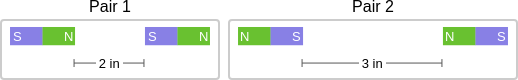

In [8]:
image

In [9]:
train_data = []
for i, row in train_df.iterrows():
    question= row['question']
    choices = row['choices']
    answer = int(row['answer'])
    split_string = choices.split("'")
    idx = answer *2 + 1
    answer = split_string[idx]
    message = {
        'question': question,
        'choices' : choices,
        'answer' : answer
    }

    # upload img
    image = row['image']

    conversation = {
        'message': message,
        'image' : image
    }
    train_data.append(conversation)

In [10]:
train_data[0]

{'message': {'question': 'أي من هذه الولايات هي الأبعد شمالا؟',
  'choices': "['فرجينيا الغربية', 'لويزيانا', 'أريزونا', 'أوكلاهوما']",
  'answer': 'فرجينيا الغربية'},
 'image': <PIL.Image.Image image mode=RGB size=750x429>}

In [11]:
val_data = []
for i, row in val_df.iterrows():
    question= row['question']
    choices = row['choices']
    answer = int(row['answer'])
    split_string = choices.split("'")
    idx = answer *2 + 1
    answer = split_string[idx]
    message = {
        'question': question,
        'choices' : choices,
        'answer' : answer
    }

    # upload img
    image = row['image']

    conversation = {
        'message': message,
        'image' : image
    }
    val_data.append(conversation)

In [12]:
val_data[0]

{'message': {'question': 'أي مما يلي يمكن أن يظهره اختبار ويندي؟',
  'choices': "['هل إنتاج المزيد من الأنسولين من شأنه أن يساعد البكتيريا على النمو بشكل أسرع؟', 'ما إذا كانت أنواع مختلفة من البكتيريا تحتاج إلى مغذيات مختلفة لإنتاج الأنسولين', 'هل أضافت ما يكفي من العناصر الغذائية لمساعدة البكتيريا على إنتاج 20% من الأنسولين؟']",
  'answer': 'هل أضافت ما يكفي من العناصر الغذائية لمساعدة البكتيريا على إنتاج 20% من الأنسولين؟'},
 'image': <PIL.Image.Image image mode=RGB size=302x232>}

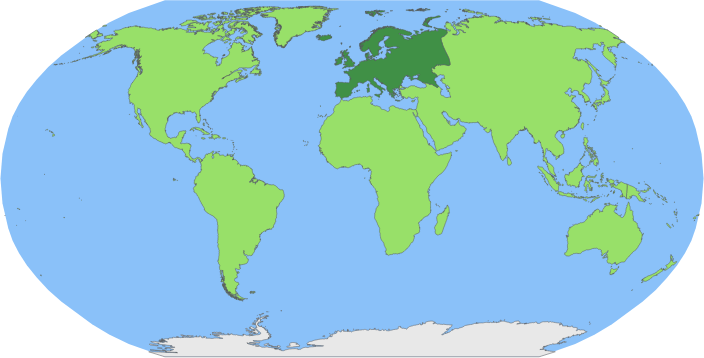

In [13]:
image